In [1]:
# Didit Adytia (adytia@telkomuniversity.ac.id)
# Source: https://towardsdatascience.com/master-machine-learning-simple-linear-regression-from-scratch-with-python-1526487c5964
# version 2021-03-02
# SIMPLE LINEAR REGRESSION - Modified version

In [2]:
# Setup setting terkait dengan plotting
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt    # import package untuk plotting
from matplotlib import rcParams    # runtime configuration (rc)
rcParams['figure.figsize']    = (14,7)   # untuk membuat visualisasi lebih baik, modif parameter dibawah ini
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

In [3]:
# mendefinisikan SIMPLE LINEAR REGRESSION
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

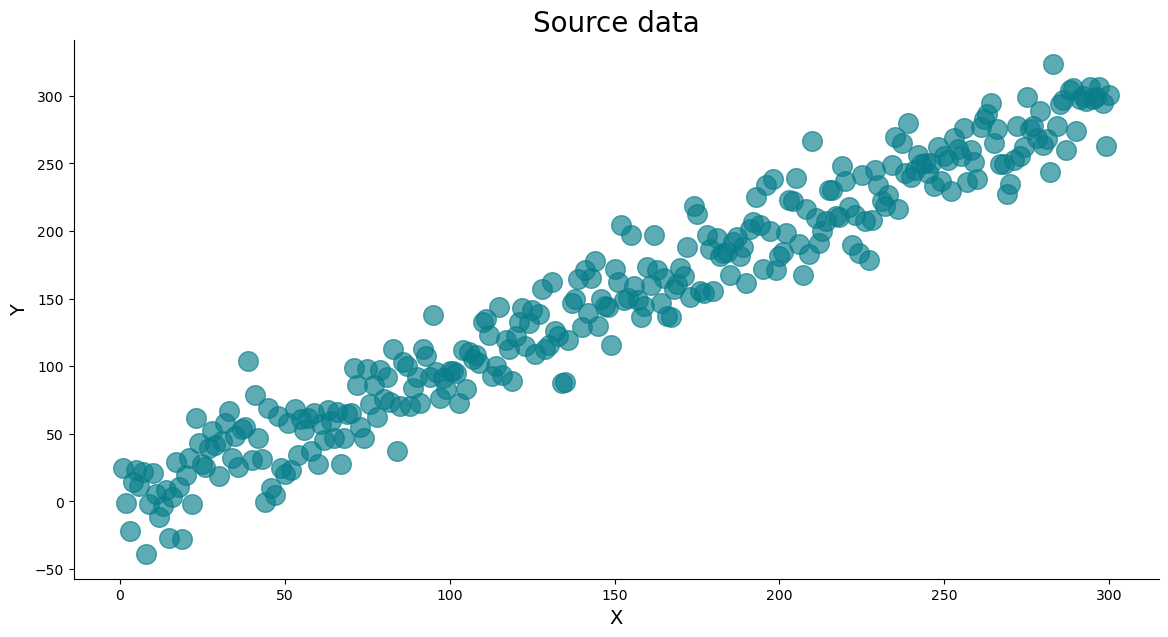

In [4]:
# Now we creating dummy data:
X = np.arange(start=1, stop=301)        # X contains a list of numbers between 1 and 300 (1, 2, 3, ..., 299, 300)
y = np.random.normal(loc=X, scale=20)   # y contains normally distributed values centered around X with standard deviation of 20 =20)

# plotting data
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65) # s=ukuranMarker, c=color, alpha=transparency
plt.title('Source data', size=20)                 # size= ukuran font
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [5]:
# for validation, we split between training data and testing data
# use sklearn package
from sklearn.model_selection import train_test_split

# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Training testing process:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction

In [6]:
# menampilkan coef hasil training: b0 and b1
model.b0, model.b1

(0.7449833672420993, 0.9996346967734957)

In [7]:
# menampilkan prediction
preds

array([204.67046151, 267.64744741, 153.68909197,  10.74133033,
       234.65950241, 227.66205953, 197.67301863, 110.70480001,
         6.74279155, 176.68069   , 238.6580412 ,  58.72379578,
       219.66498196,  46.72817942, 183.67813288, 222.66388605,
       290.63904543, 212.66753908, 149.69055319, 166.68434303,
        79.71612441, 114.7033388 , 250.65365756, 251.65329226,
       105.70662653,  43.72927533, 282.64196786, 296.63685361,
       158.68726546, 239.6576759 ,  18.73840791, 165.68470833,
        34.73256306,  25.73585079, 216.66607787, 120.70114698,
         8.74206094,  91.71174077,  47.72781412,  74.71795093,
        94.71064486,  77.71685502, 287.64014134,  61.72269987,
        78.71648972,  64.72160396, 235.65913711, 230.66096363,
       112.70406941, 232.66023302, 181.67886348, 145.6920144 ,
       240.65731059,  76.71722032, 298.63612301, 279.64306377,
        98.70918365,  93.71101017, 193.67447984,  26.73548548])

In [8]:
# menampilkan y_test (data untuk di compare dengan prediction)
y_test

array([221.87905967, 249.41426487, 148.97818751,  21.03890717,
       248.95769873, 178.61737894, 199.71610697, 132.34552382,
        11.24699681, 155.61440862, 243.15722989,  37.52734182,
       247.77934893,   9.96187261, 183.54071737, 189.9720002 ,
       274.130821  , 190.91346001, 115.97566445, 137.17007479,
        96.93079113,  99.95474363, 255.15137884, 252.63577375,
        82.94044766,  31.53487503, 243.81612434, 299.42822459,
       136.59438994, 280.08430162,  10.73327936, 165.10521637,
        31.90641477,  27.68451749, 230.38948309, 122.22655653,
       -39.06940632,  73.03020115,   4.89255197,  47.18868798,
        91.6772242 ,  85.89929373, 260.01720805,  57.34830198,
        62.07952545,  59.55373944, 269.29368872, 233.95134182,
       122.91748944, 218.51702152, 194.92120132, 129.77646713,
       239.62296944,  72.34284837, 294.54003449, 288.76792926,
        91.07339232, 107.69209695, 224.83864554,  25.09944499])

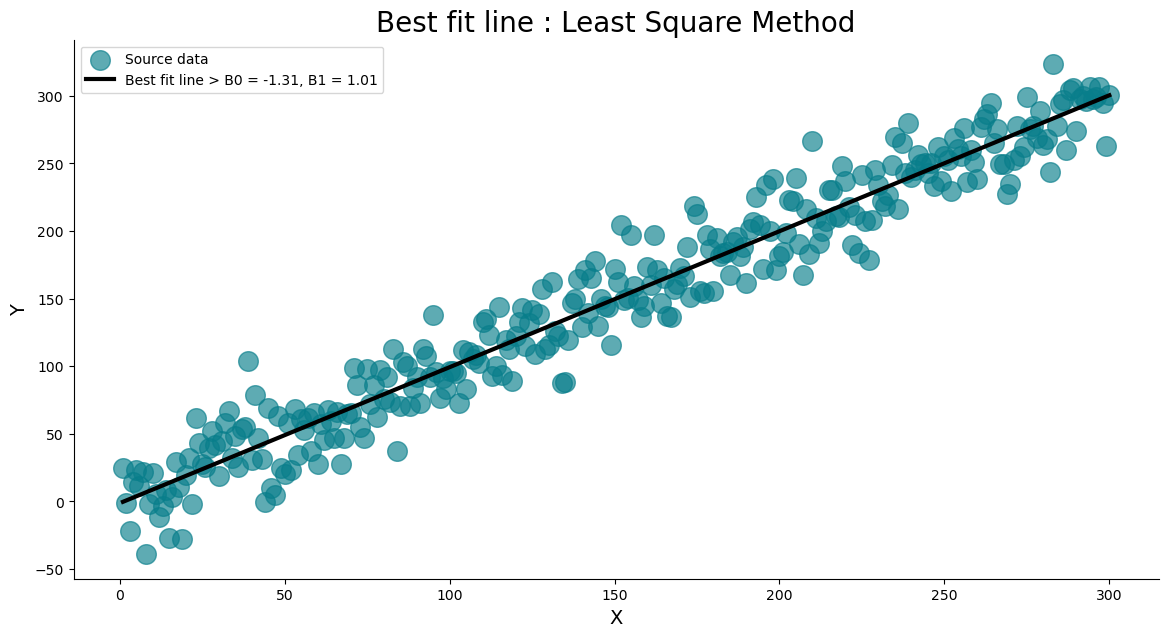

In [9]:
# VALIDATION ? 
# 1. Qualitatively --> visualization
# 2. Quantitative  --> RMSE, MAE, etc

# 1. QUALITATIVE
# Visualize the data, by using best fit line
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()

In [10]:
# 2. QUANTITATIVE Comparison 
# now we will validate the predicted value with testing data using RMSE
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))   # definisikan y sbg variable?
rmse(y_test, preds)

20.597857218739357

In [11]:
# Now we will compare with SCIKIT-LEARN: LinearRegression
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(0.7449833672420993, array([0.9996347]))

In [12]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
# hasil nya hampir sama dengan perhitungan di atas.

KeyboardInterrupt: 

In [ ]:
# Now we will playing with parameters in SVR - LINEAR
from sklearn.svm import SVR

# now we use linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin.fit(np.array(X_train).reshape(-1,1), y_train)        # training the model
svr_lin_preds = svr_lin.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin = rmse(y_test, svr_lin_preds)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, svr_lin_preds, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()


In [ ]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)